In [1]:
from ReadFromDB import create_station_dictionary as csd
from ReadFromDB import station_dict_row as sdr
from ReadFromDB import read_weather as rw
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
station = csd(2)[2]
weather = rw(2)

In [3]:
time_sec = station.last_updated/1000
day = list(np.zeros(len(time_sec)))
hour = list(np.zeros(len(time_sec)))
minute = list(np.zeros(len(time_sec)))
second = list(np.zeros(len(time_sec)))
date = list(np.zeros(len(time_sec)))
for i in range(len(time_sec)):
    date[i] = datetime.fromtimestamp(time_sec[i]).strftime("%x")
    day[i] = datetime.fromtimestamp(time_sec[i]).strftime("%a")
    hour[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%H"))
    minute[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%M"))
    second[i] = int(datetime.fromtimestamp(time_sec[i]).strftime("%S"))

In [4]:
first_half = []
second_half = []

for m in minute:
    if m<30:
        first_half.append(True)
        second_half.append(False)
    else:
        first_half.append(False)
        second_half.append(True)

In [41]:
for i, row in station.iterrows():
    row.hour = hour[i]
# hour_counts = list(np.zeros(23))

# for i in range(23):
#     hour_counts[i] = hour.count(i+1)

# hour_counts
# plt.figure(figsize=(16,9))
# plt.scatter(hour, station.available_bikes)
# plt.xlabel("Hour")
# plt.ylabel("Available Bikes")

In [49]:
# station = station.assign(hour=pd.Series(hour, index=station.index))


Text(0.5, 0, 'Hour')

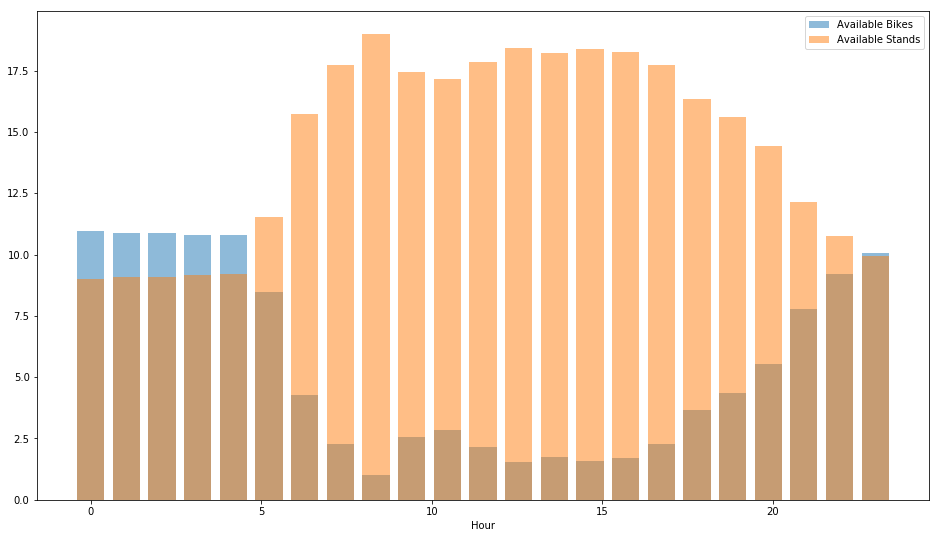

In [86]:
available_bikes_avg = list(np.zeros(23))
available_stands_avg = list(np.zeros(23))
for i in range(23):
    available_bikes_avg[i] = np.mean(station[station.hour==i+1].available_bikes)
    available_stands_avg[i] = np.mean(station[station.hour==i+1].available_bike_stands)
plt.figure(figsize=(16,9))
plt.bar(np.linspace(0,23,23), available_bikes_avg, alpha=0.5, label='Available Bikes')
plt.bar(np.linspace(0,23,23), available_stands_avg, alpha=0.5, label='Available Stands')
plt.legend(loc='best')
plt.xlabel('Hour')
# plt.ylabel('Average available bikes')

Text(0, 0.5, 'Available Bike Stands')

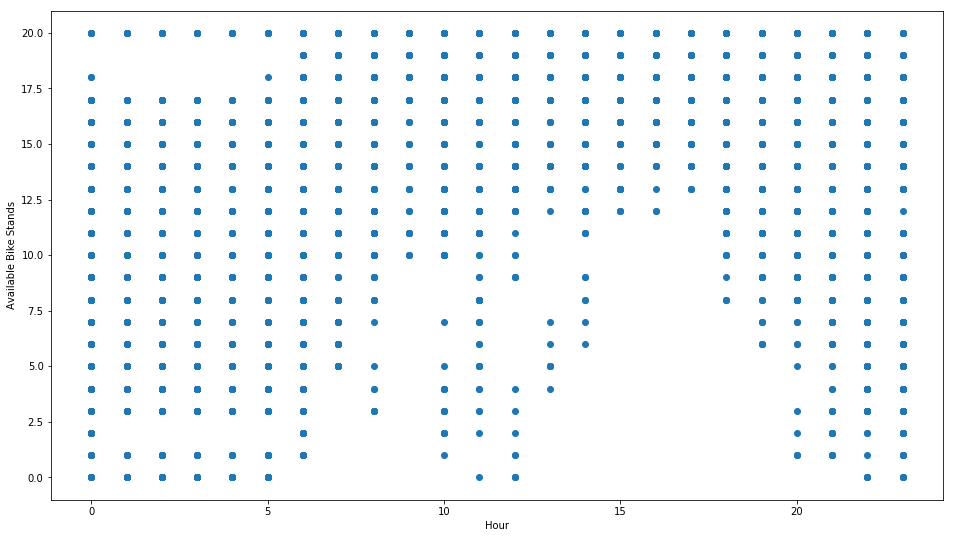

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(hour, station.available_bike_stands)
plt.xlabel("Hour")
plt.ylabel("Available Bike Stands")

In [7]:
weather_times = weather.time
weather_date = list(np.zeros(len(weather_times)))
weather_day = list(np.zeros(len(weather_times)))
weather_hour = list(np.zeros(len(weather_times)))
weather_minute = list(np.zeros(len(weather_times)))
weather_second = list(np.zeros(len(weather_times)))
for i in range(len(weather_times)):
    weather_date[i] = datetime.fromtimestamp(weather_times[i]).strftime("%x")
    weather_day[i] = datetime.fromtimestamp(weather_times[i]).strftime("%a")
    weather_hour[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%H"))
    weather_minute[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%M"))
    weather_second[i] = int(datetime.fromtimestamp(weather_times[i]).strftime("%S"))

In [8]:
weather_first_half = []
weather_second_half = []

for m in weather_minute:
    if m<30:
        weather_first_half.append(True)
        weather_second_half.append(False)
    else:
        weather_first_half.append(False)
        weather_second_half.append(True)

In [9]:
weather_data = [weather_date, 
        weather_day, 
        weather_hour, 
        weather_minute, 
        weather_second, 
        weather_first_half, 
        weather_second_half]

weather_time_df = pd.DataFrame(np.transpose(weather_data),
                              columns=['date',
                                      'day',
                                      'hour',
                                      'minute',
                                      'second',
                                      'first_half_hour',
                                      'second_half_hour'])

In [10]:
# weather_time_df

In [87]:
station_data = [date, day, hour, minute, second, first_half, second_half]
station_time_df = pd.DataFrame(np.transpose(station_data),
                              columns=['date',
                                      'day',
                                      'hour',
                                      'minute',
                                      'second',
                                      'first_half_hour',
                                      'second_half_hour'])


In [12]:
dates = []

for i, row in station_time_df.iterrows():
    if (row.date==weather_time_df.date[0]):
#         print(row.date)
        continue

In [13]:
# station_time_df.loc[939]
# dates

In [14]:
datetime.fromtimestamp(weather['time'][0]).strftime("%X")

'11:46:10'

In [15]:
weather_times = pd.to_datetime(weather.time, unit='s')

In [16]:
weather_times[1].strftime("%H")

'11'

,0
0,<bound method DataFrame.transpose of stat...
1,"[16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 1..."
